# Stock Advsing Models

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

/Users/pulicharishma/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Stock data Loading

In [2]:
stock = 'TSLA'
start = datetime.datetime(2021,1, 1)
end = datetime.datetime(2022,8, 1)
tsla_data = yf.download(stock, start=start, end=end, interval= '1d')['Close']

[*********************100%%**********************]  1 of 1 completed


In [3]:
tsla_data = tsla_data.to_frame()
tsla_data

,Close
Date,
2021-01-04,243.256668
2021-01-05,245.036667
2021-01-06,251.993332
2021-01-07,272.013336
2021-01-08,293.339996
...,...
2022-07-25,268.433319
2022-07-26,258.859985
2022-07-27,274.820007


## Data Processsing and Exploratory Data Analysis

<Axes: title={'center': 'Stock Data over Time'}, xlabel='Date'>

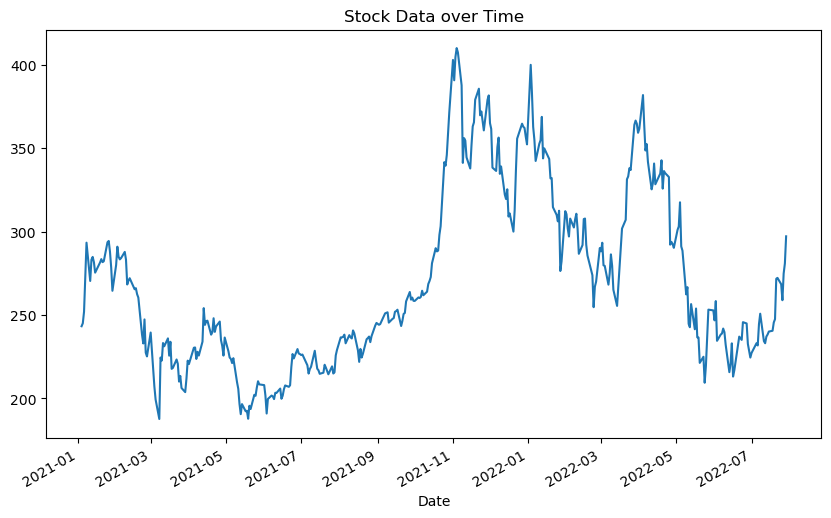

In [4]:
plt.title('Stock Data over Time')
tsla_data['Close'].plot()

### Augmented Dickey-Fuller test

In [5]:
from statsmodels.tsa.stattools import adfuller

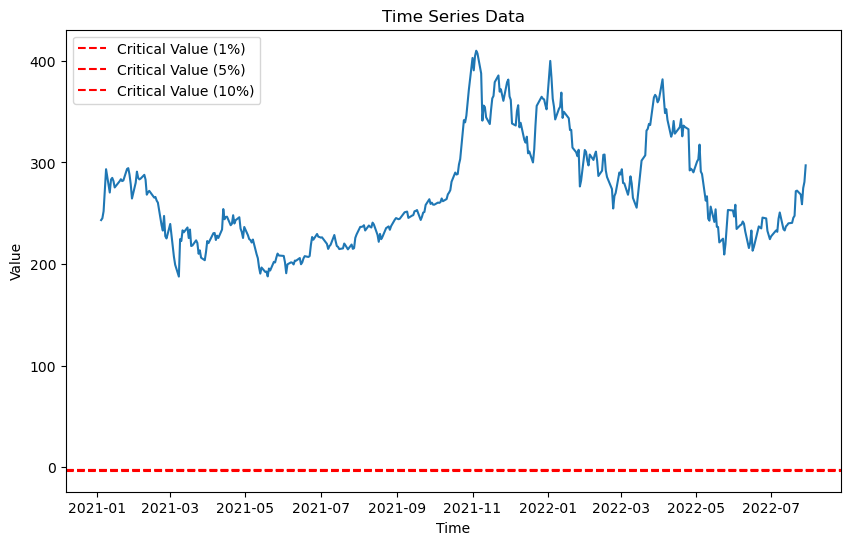

ADF Statistic: -2.0581761020790825
p-value: 0.26166116765203706
Fail to reject the null hypothesis: The time series is non-stationary.


In [6]:
result = adfuller(tsla_data)

# Extract ADF test statistics and critical values
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Plot time series data
plt.plot(tsla_data)
plt.title('Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')

# Add critical value lines to the plot
for key, value in critical_values.items():
    plt.axhline(y=value, color='r', linestyle='--', label=f'Critical Value ({key})')

# Show legend
plt.legend()

# Show plot
plt.show()

# Print ADF test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

# Interpret ADF test results
if p_value < 0.05:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")


### Differencing

In [7]:
tsla_data['first_diff'] = tsla_data['Close'].diff().dropna()
tsla_data.dropna(inplace=True)
tsla_data

,Close,first_diff
Date,,
2021-01-05,245.036667,1.779999
2021-01-06,251.993332,6.956665
2021-01-07,272.013336,20.020004
2021-01-08,293.339996,21.326660
2021-01-11,270.396667,-22.943329
...,...,...
2022-07-25,268.433319,-3.810028
2022-07-26,258.859985,-9.573334
2022-07-27,274.820007,15.960022


In [8]:
tsla_data['Returns'] = tsla_data['Close'].pct_change()
tsla_data.dropna(inplace=True)
tsla_data

,Close,first_diff,Returns
Date,,,
2021-01-06,251.993332,6.956665,0.028390
2021-01-07,272.013336,20.020004,0.079447
2021-01-08,293.339996,21.326660,0.078403
2021-01-11,270.396667,-22.943329,-0.078214
2021-01-12,283.146667,12.750000,0.047153
...,...,...,...
2022-07-25,268.433319,-3.810028,-0.013995
2022-07-26,258.859985,-9.573334,-0.035664
2022-07-27,274.820007,15.960022,0.061655


<Axes: title={'center': 'First Difference over Time '}, xlabel='Date'>

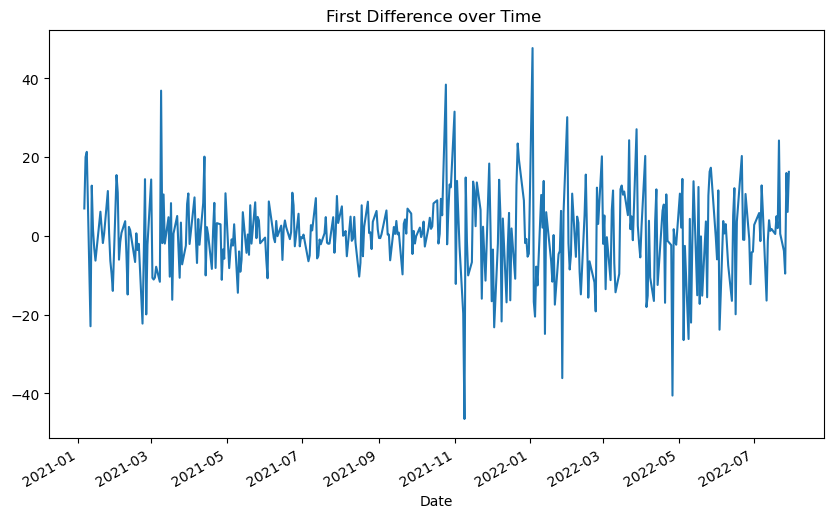

In [9]:
plt.title('First Difference over Time ')
tsla_data['first_diff'].plot()

#### ADF tesr for first differencing and returns

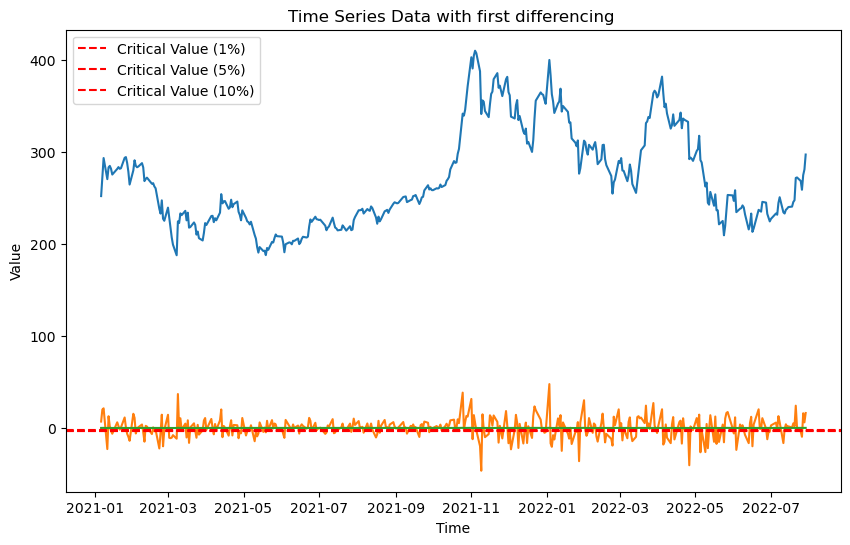

ADF Statistic: -6.107138958596365
p-value: 9.524609995182312e-08
Reject the null hypothesis: The time series is stationary.


In [10]:
result = adfuller(tsla_data['first_diff'])

# Extract ADF test statistics and critical values
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Plot time series data
plt.plot(tsla_data)
plt.title('Time Series Data with first differencing ')
plt.xlabel('Time')
plt.ylabel('Value')

# Add critical value lines to the plot
for key, value in critical_values.items():
    plt.axhline(y=value, color='r', linestyle='--', label=f'Critical Value ({key})')

# Show legend
plt.legend()

# Show plot
plt.show()

# Print ADF test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

# Interpret ADF test results
if p_value < 0.05:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")


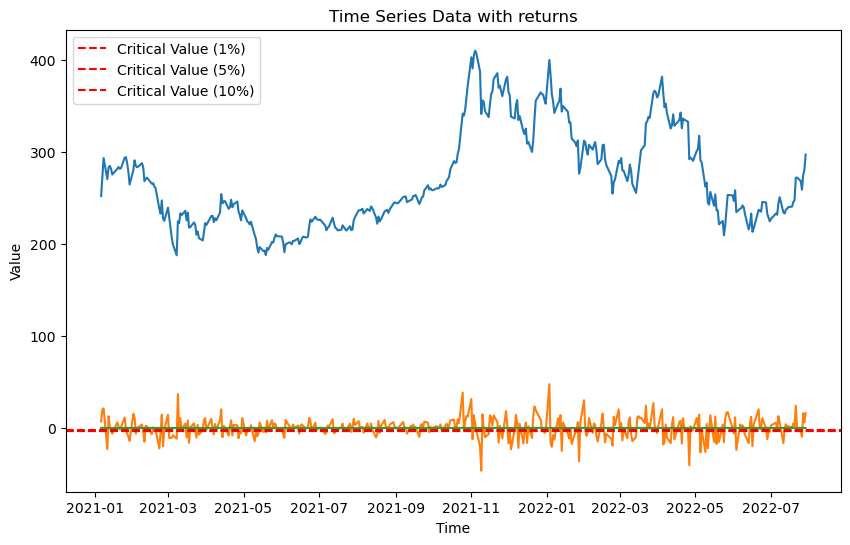

ADF Statistic: -20.900633476251816
p-value: 0.0
Reject the null hypothesis: The time series is stationary.


In [11]:
result = adfuller(tsla_data['Returns'])

# Extract ADF test statistics and critical values
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

# Plot time series data
plt.plot(tsla_data)
plt.title('Time Series Data with returns')
plt.xlabel('Time')
plt.ylabel('Value')

# Add critical value lines to the plot
for key, value in critical_values.items():
    plt.axhline(y=value, color='r', linestyle='--', label=f'Critical Value ({key})')

# Show legend
plt.legend()

# Show plot
plt.show()

# Print ADF test results
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

# Interpret ADF test results
if p_value < 0.05:
    print("Reject the null hypothesis: The time series is stationary.")
else:
    print("Fail to reject the null hypothesis: The time series is non-stationary.")


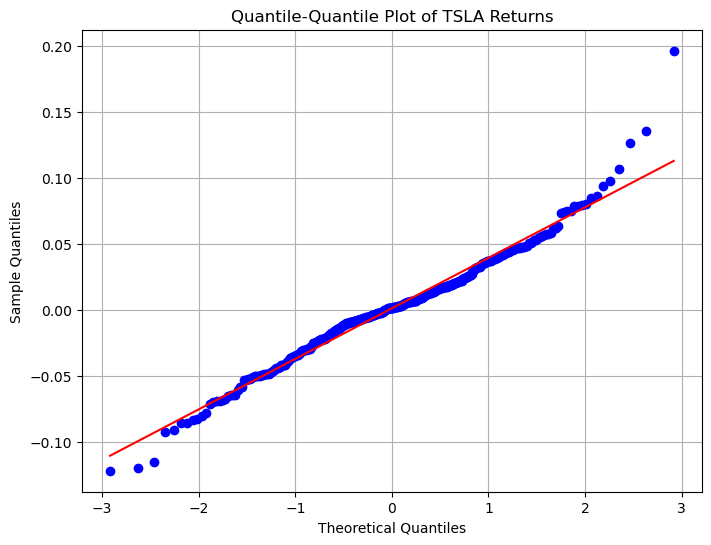

In [12]:
import scipy.stats as stats

# Generate theoretical quantiles based on normal distribution
theoretical_quantiles = stats.norm.ppf([i / len(tsla_data['Returns']) for i in range(1, len(tsla_data['Returns']) + 1)])

# Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(tsla_data['Returns'], dist="norm", plot=plt)
plt.title('Quantile-Quantile Plot of TSLA Returns')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

In [13]:
tsla_returns = tsla_data['Returns']

In [14]:
import numpy as np

def remove_outliers_iqr(data):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    
    # Remove outliers
    cleaned_data = data[~outliers]
    
    return cleaned_data

# Assuming 'returns' is your array containing the returns of TSLA stock
cleaned_returns = remove_outliers_iqr(tsla_returns)

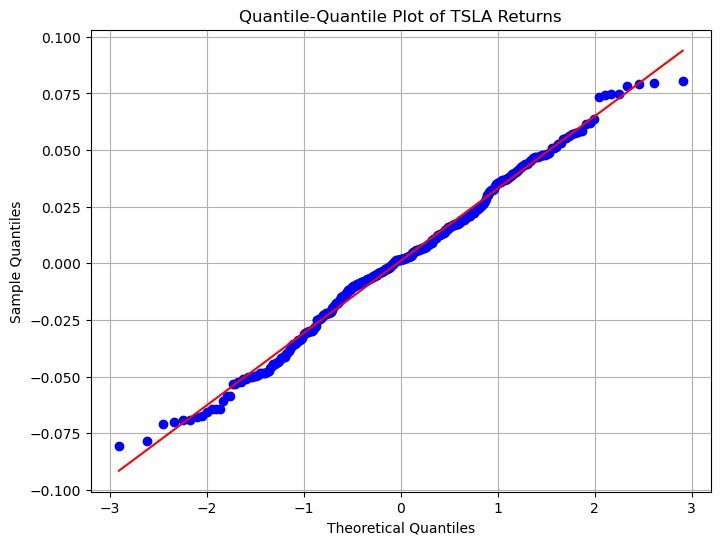

In [15]:
import scipy.stats as stats

# Generate theoretical quantiles based on normal distribution
theoretical_quantiles = stats.norm.ppf([i / len(cleaned_returns) for i in range(1, len(cleaned_returns) + 1)])

# Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(cleaned_returns, dist="norm", plot=plt)
plt.title('Quantile-Quantile Plot of TSLA Returns')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

## Data Modeling

### LSTM

In [16]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras. models import Sequential
from keras. layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM

__Next Day Prediction__

In [17]:
data = tsla_data

# Feature scaling using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Close']])

# Create sequences of data for training the LSTM
def create_sequences(data, timestep):
    X, y = [], []
    for i in range(len(data) - timestep):
        X.append(data[i:(i + timestep), 0])
        y.append(data[i + timestep, 0])
    return np.array(X), np.array(y)

timestep = 60  # Number of previous time steps to consider
X, y = create_sequences(data_scaled, timestep)

# Reshape the data for LSTM input (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Make predictions on new data (you may need to adjust this part based on your data)
test_data = data.tail(timestep)  # Use the last 'timestep' data points for testing
input_data = scaler.transform(test_data[['Close']])
input_data = np.reshape(input_data, (1, timestep, 1))
predicted_price = model.predict(input_data)

# Inverse transform the predicted price to the original scale
predicted_price = scaler.inverse_transform(predicted_price)

print("Predicted Stock Price:", predicted_price)

Epoch 1/10
11/11 [==============================] - 2s 24ms/step - loss: 0.0787
Epoch 2/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0242
Epoch 3/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0192
Epoch 4/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0168
Epoch 5/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0174
Epoch 6/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0155
Epoch 7/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0129
Epoch 8/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0128
Epoch 9/10
11/11 [==============================] - 0s 25ms/step - loss: 0.0124
Epoch 10/10
1/1 [==============================] - 0s 469ms/step
Predicted Stock Price: [[266.16495]]


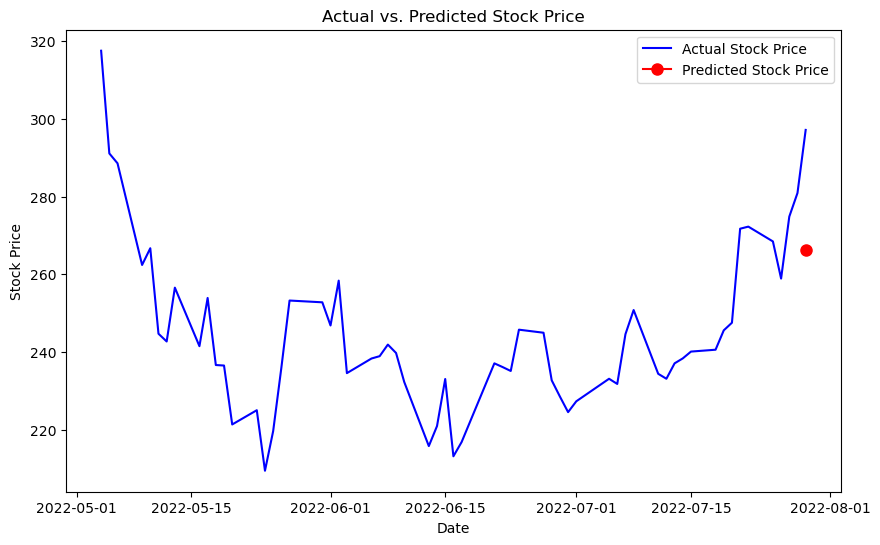

In [18]:
# Plotting the actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual Stock Price', color='blue')
plt.plot(test_data.index[-1], predicted_price[0, 0], marker='o', markersize=8, label='Predicted Stock Price', color='red')
plt.title('Actual vs. Predicted Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

__14 days forecasting__

In [19]:
data = tsla_data

# Feature scaling using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Close']])

# Create sequences of data for training the LSTM
def create_sequences(data, timestep):
    X, y = [], []
    for i in range(len(data) - timestep):
        X.append(data[i:(i + timestep), 0])
        y.append(data[i + timestep, 0])
    return np.array(X), np.array(y)

timestep = 60  # Number of previous time steps to consider
X, y = create_sequences(data_scaled, timestep)

# Reshape the data for LSTM input (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Make predictions for multiple future prices
num_predictions = 14  # Adjust as needed
future_predictions = []

# Use the last 'timestep' data points for the initial prediction
input_data = data_scaled[-timestep:]
input_data = np.reshape(input_data, (1, timestep, 1))

lstm_future_predictions_list = []
for _ in range(num_predictions):
    # Predict the next price
    predicted_price = model.predict(input_data)

    # Inverse transform the predicted prices to the original scale
    future_predictions = scaler.inverse_transform(np.array(predicted_price[0, 0]).reshape(-1, 1))

    lstm_future_predictions_list.append(future_predictions)

    # Update input_data for the next prediction
    input_data = np.append(input_data[:, 1:, :], np.reshape(predicted_price, (1, 1, 1)), axis=1)

Epoch 1/10
11/11 [==============================] - 2s 23ms/step - loss: 0.0454
Epoch 2/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0220
Epoch 3/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0188
Epoch 4/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0157
Epoch 5/10
11/11 [==============================] - 0s 30ms/step - loss: 0.0149
Epoch 6/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0148
Epoch 7/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0119
Epoch 8/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0120
Epoch 9/10
11/11 [==============================] - 0s 25ms/step - loss: 0.0124
Epoch 10/10
1/1 [==============================] - 0s 9ms/step


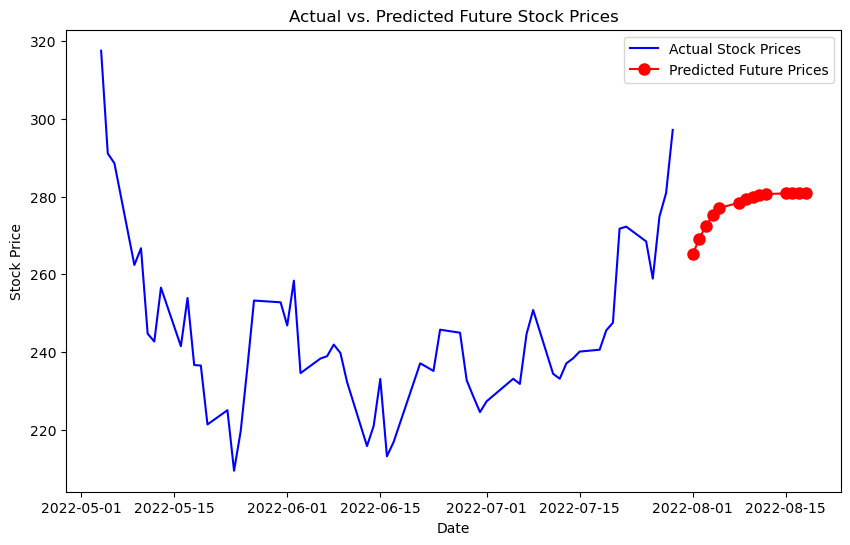

In [20]:
# Plotting the actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(data.index[-timestep:], data['Close'].tail(timestep), label='Actual Stock Prices', color='blue')

# Generating future dates for the predicted prices
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(1, 'D'), periods=num_predictions, freq='B')

# Reshape future_predictions_list to 1D array
lstm_future_predictions_list = np.array(lstm_future_predictions_list).flatten()

plt.plot(future_dates, lstm_future_predictions_list, marker='o', markersize=8, label='Predicted Future Prices', color='red')
plt.title('Actual vs. Predicted Future Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


I have observed because of the epochs and loss the lstm plot is continuously changing for every run

### ARIMA

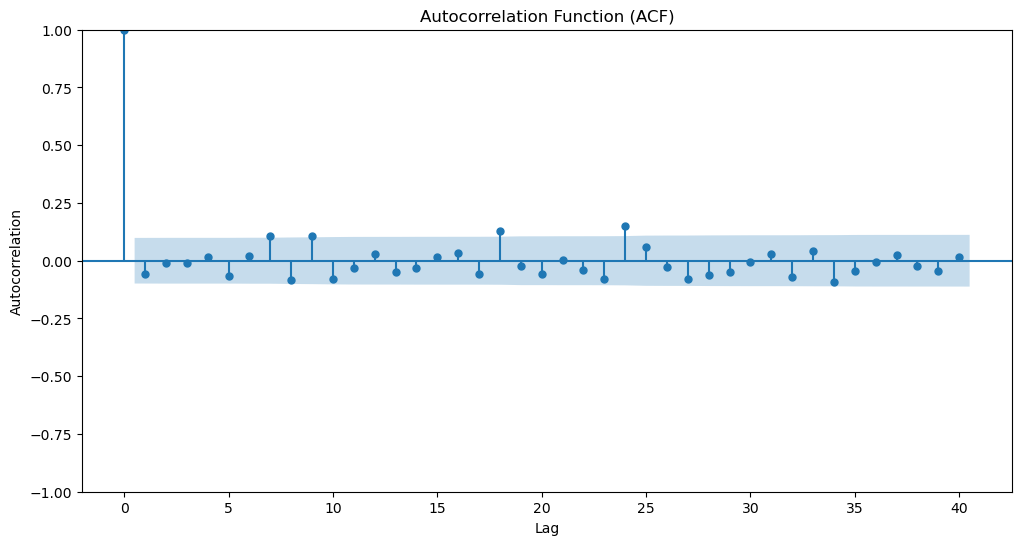

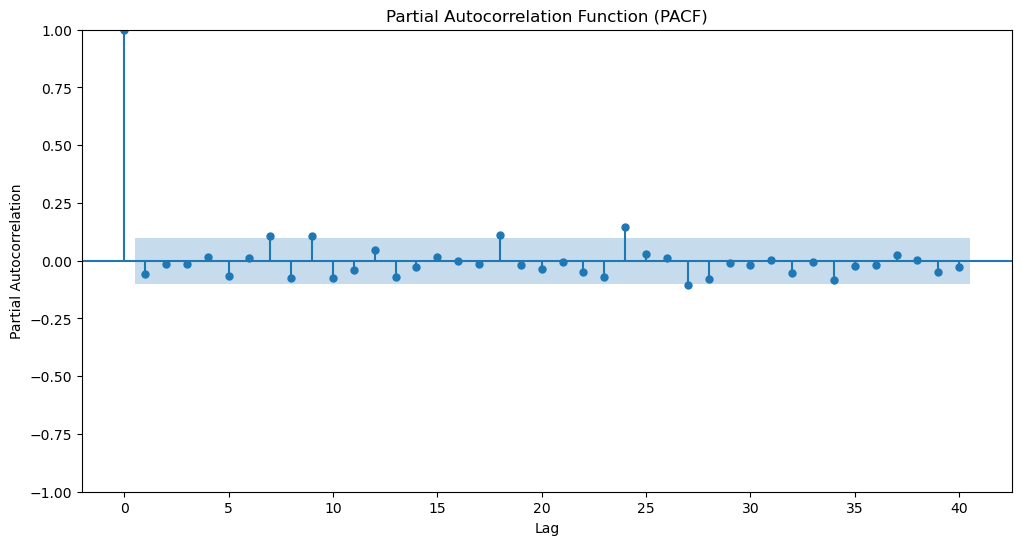

In [21]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(tsla_data['Returns'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(tsla_data['Returns'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


From above acf the ma and ar is at lag 9 and with the pacf also the lags are same

In [22]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf

# Fit ARIMA model on differenced series
order = (7, 0, 7)  # You may need to adjust the order based on the ACF and PACF plots
arima_model = ARIMA(tsla_data['Returns'], order=order)
arima_result = arima_model.fit()

# Print ARIMA model summary
print(arima_result.summary())


/Users/pulicharishma/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pulicharishma/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pulicharishma/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                  394
Model:                 ARIMA(7, 0, 7)   Log Likelihood                 735.045
Date:                Sun, 05 May 2024   AIC                          -1438.090
Time:                        10:49:26   BIC                          -1374.468
Sample:                             0   HQIC                         -1412.880
                                - 394                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.002      0.491      0.624      -0.003       0.005
ar.L1         -0.4853      0.756     -0.642      0.521      -1.967       0.996
ar.L2          0.2993      0.888      0.337      0.7

/Users/pulicharishma/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
num_preds = 14
# Forecast future values for 14 days
forecast = arima_result.forecast(steps=num_preds)
print(forecast)

394    0.000697
395    0.000564
396    0.000361
397   -0.011127
398    0.004930
399   -0.001092
400    0.010089
401    0.003042
402    0.006966
403   -0.002237
404   -0.002144
405   -0.001948
406   -0.002833
407    0.002854
Name: predicted_mean, dtype: float64


/Users/pulicharishma/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [24]:
# Last known closing price
last_close_price = tsla_data['Close'].iloc[-1]

# Convert returns forecast to original closing price form
forecast_cumsum = forecast.cumsum()
forecast_close_price = last_close_price * (1 + forecast_cumsum)

# Print the converted forecasted closing prices
print(forecast_close_price)


394    297.357186
395    297.524755
396    297.631899
397    294.325506
398    295.790382
399    295.465857
400    298.463690
401    299.367696
402    301.437661
403    300.772828
404    300.135701
405    299.556917
406    298.714995
407    299.562991
Name: predicted_mean, dtype: float64


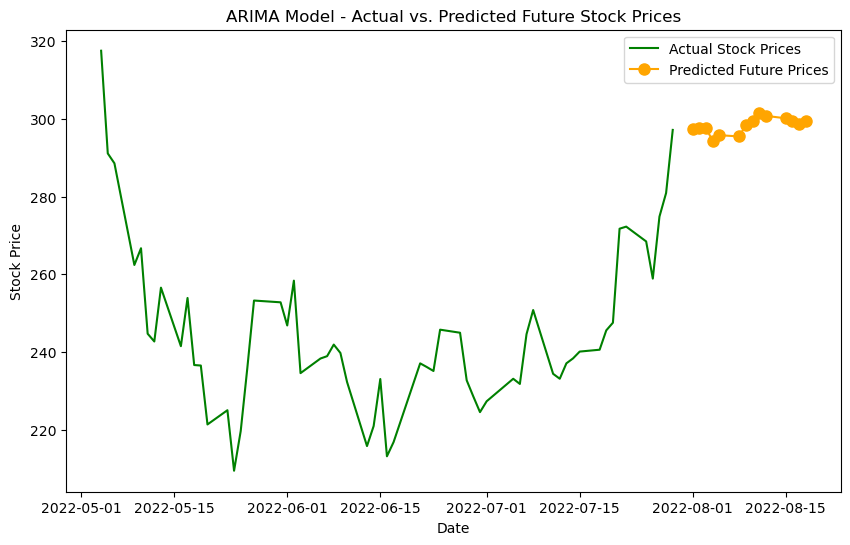

In [25]:
# Plotting the actual vs. predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(data.index[-timestep:], tsla_data['Close'].tail(timestep), label='Actual Stock Prices', color='green')

# Generating future dates for the predicted prices
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(1, 'D'), periods=num_preds, freq='B')

# Reshape future_predictions_list to 1D array
ARIMA_forecast_close_price = np.array(forecast_close_price).flatten()

plt.plot(future_dates, ARIMA_forecast_close_price, marker='o', markersize=8, label='Predicted Future Prices', color='orange')
plt.title('ARIMA Model - Actual vs. Predicted Future Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


### Prophet

In [26]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [27]:
# Calculate the index to split at 80%
split_index = int(len(tsla_data['Close']) * 0.8)

# Split the DataFrame
data_train = tsla_data.iloc[:split_index]
data_test = tsla_data.iloc[split_index:]


,ds,y,first_diff,Returns
310,2022-03-30,364.663330,-1.860016,-0.005075
311,2022-03-31,359.200012,-5.463318,-0.014982
312,2022-04-01,361.529999,2.329987,0.006487
313,2022-04-04,381.816681,20.286682,0.056113
314,2022-04-05,363.753326,-18.063354,-0.047309


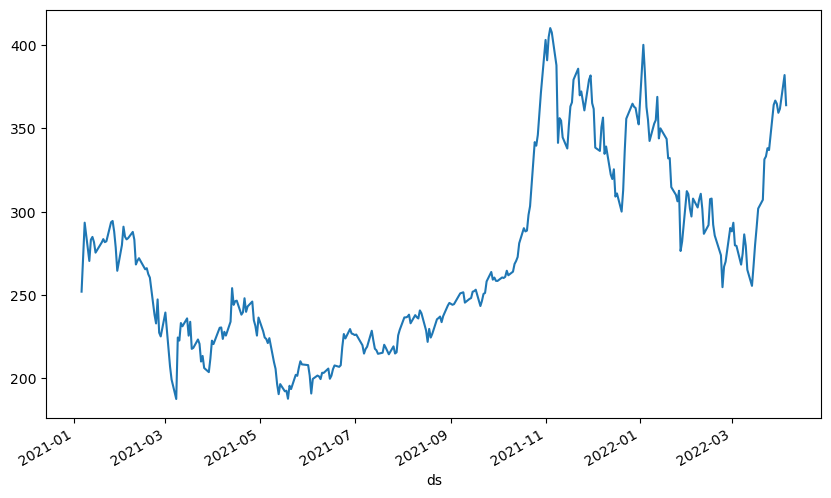

In [28]:
df = data_train.reset_index()
df=df.rename(columns={'Date':'ds', 'Close':'y'})
df['ds'] = pd.to_datetime(df['ds'])
df.set_index('ds').y.plot()
df.tail(5)

In [29]:
from prophet import Prophet

model = Prophet(daily_seasonality=True)
model.fit(df)

10:49:30 - cmdstanpy - INFO - Chain [1] start processing
10:49:30 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
future = model.make_future_dataframe(periods= int((data_test.index[-1] - data_train.index[-1]).days),freq = 'd')
future.tail(14)

,ds
416,2022-07-16
417,2022-07-17
418,2022-07-18
419,2022-07-19
420,2022-07-20
421,2022-07-21
422,2022-07-22
423,2022-07-23
424,2022-07-24
425,2022-07-25


In [31]:
# Eliminate weekend from future dataframe
future['day'] = future['ds'].dt.weekday
future = future[(future['day']<5)]
future.tail(14)

,ds,day
412,2022-07-12,1
413,2022-07-13,2
414,2022-07-14,3
415,2022-07-15,4
418,2022-07-18,0
419,2022-07-19,1
420,2022-07-20,2
421,2022-07-21,3
422,2022-07-22,4
425,2022-07-25,0


In [32]:
forecast = model.predict(future)

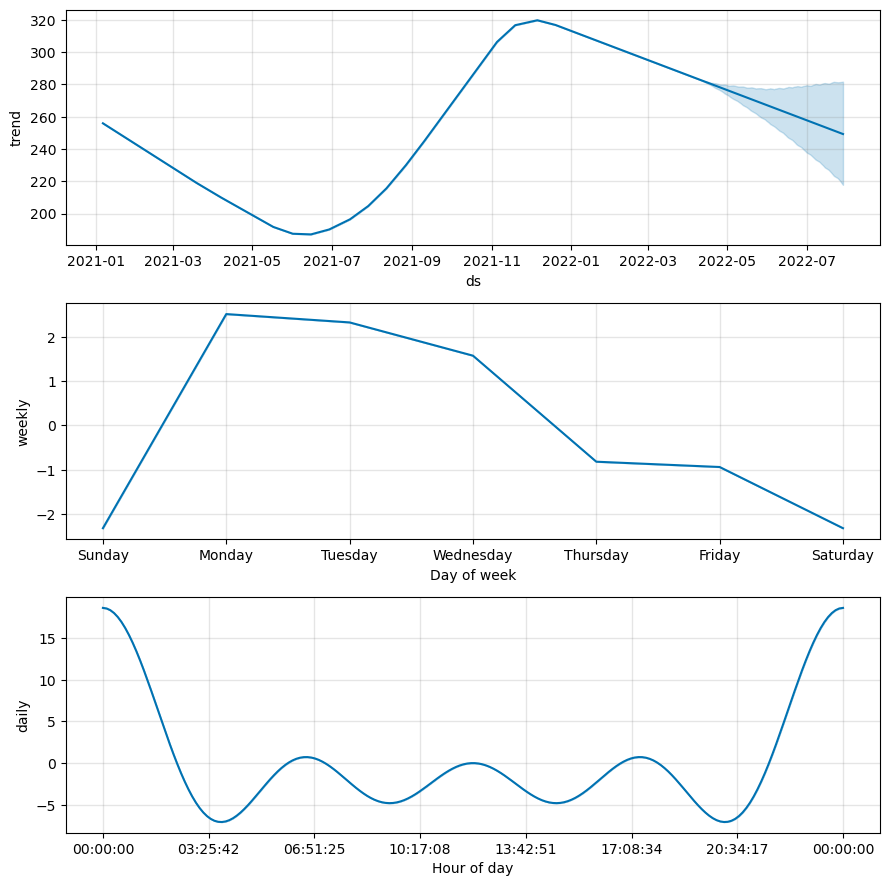

In [33]:
fig = model.plot_components(forecast)

In [34]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2021-01-06,276.099069,243.517088,309.594784
1,2021-01-07,273.188414,242.035198,304.701444
2,2021-01-08,272.555078,239.384628,304.254696
3,2021-01-11,274.471778,241.886405,306.810363
4,2021-01-12,273.769679,239.478953,309.632076
...,...,...,...,...
393,2022-07-25,271.602175,227.140016,317.011208
394,2022-07-26,271.107838,223.652842,316.541954
395,2022-07-27,270.050358,225.616451,314.875138
396,2022-07-28,267.347465,221.287591,314.607971


In [35]:
new_df = df.set_index('ds')
new_forecast = forecast.set_index('ds')
viz_df = tsla_data.join(new_forecast[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df

,Close,first_diff,Returns,yhat,yhat_lower,yhat_upper
2021-01-06,251.993332,6.956665,0.028390,276.099069,243.517088,309.594784
2021-01-07,272.013336,20.020004,0.079447,273.188414,242.035198,304.701444
2021-01-08,293.339996,21.326660,0.078403,272.555078,239.384628,304.254696
2021-01-11,270.396667,-22.943329,-0.078214,274.471778,241.886405,306.810363
2021-01-12,283.146667,12.750000,0.047153,273.769679,239.478953,309.632076
...,...,...,...,...,...,...
2022-07-25,268.433319,-3.810028,-0.013995,271.602175,227.140016,317.011208
2022-07-26,258.859985,-9.573334,-0.035664,271.107838,223.652842,316.541954
2022-07-27,274.820007,15.960022,0.061655,270.050358,225.616451,314.875138
2022-07-28,280.899994,6.079987,0.022124,267.347465,221.287591,314.607971


In [36]:
tsla_data.index = pd.to_datetime(tsla_data.index) #make sure our index as a datetime object
connect_date = data_train.index[-2] #select the 2nd to last date
connect_date

Timestamp('2022-04-04 00:00:00')

In [37]:
mask = (new_forecast.index > connect_date)
predict_df = new_forecast.loc[mask]

In [38]:
predict_df.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2022-04-05,284.420227,270.477944,337.958376,284.420227,284.420227,20.932349,20.932349,20.932349,18.605915,18.605915,18.605915,2.326435,2.326435,2.326435,0.0,0.0,0.0,305.352576
2022-04-06,284.114470,272.965026,338.357454,284.114470,284.114470,20.180626,20.180626,20.180626,18.605915,18.605915,18.605915,1.574711,1.574711,1.574711,0.0,0.0,0.0,304.295096
2022-04-07,283.808714,269.830709,333.347786,283.808714,283.808714,17.783489,17.783489,17.783489,18.605915,18.605915,18.605915,-0.822426,-0.822426,-0.822426,0.0,0.0,0.0,301.592202
2022-04-08,283.502957,265.899405,334.048705,283.493182,283.502957,17.663672,17.663672,17.663672,18.605915,18.605915,18.605915,-0.942243,-0.942243,-0.942243,0.0,0.0,0.0,301.166629
2022-04-11,282.585687,270.716132,335.375181,282.532641,282.640357,21.120930,21.120930,21.120930,18.605915,18.605915,18.605915,2.515015,2.515015,2.515015,0.0,0.0,0.0,303.706617


In [39]:
viz_df = tsla_data.join(predict_df[['yhat', 'yhat_lower','yhat_upper']], how = 'outer')
viz_df.tail(10)

,Close,first_diff,Returns,yhat,yhat_lower,yhat_upper
2022-07-18,240.546661,0.479996,0.001999,273.742472,232.270037,318.342582
2022-07-19,245.529999,4.983337,0.020717,273.248134,232.740050,317.018311
2022-07-20,247.500000,1.970001,0.008023,272.190654,228.439232,319.781677
2022-07-21,271.706665,24.206665,0.097805,269.487761,226.538594,314.490003
2022-07-22,272.243347,0.536682,0.001975,269.062187,223.824818,316.504112
2022-07-25,268.433319,-3.810028,-0.013995,271.602175,227.140016,317.011208
2022-07-26,258.859985,-9.573334,-0.035664,271.107838,223.652842,316.541954
2022-07-27,274.820007,15.960022,0.061655,270.050358,225.616451,314.875138
2022-07-28,280.899994,6.079987,0.022124,267.347465,221.287591,314.607971
2022-07-29,297.149994,16.250000,0.057850,266.921891,223.013046,314.768729


In [40]:
viz_df.tail(10)

,Close,first_diff,Returns,yhat,yhat_lower,yhat_upper
2022-07-18,240.546661,0.479996,0.001999,273.742472,232.270037,318.342582
2022-07-19,245.529999,4.983337,0.020717,273.248134,232.740050,317.018311
2022-07-20,247.500000,1.970001,0.008023,272.190654,228.439232,319.781677
2022-07-21,271.706665,24.206665,0.097805,269.487761,226.538594,314.490003
2022-07-22,272.243347,0.536682,0.001975,269.062187,223.824818,316.504112
2022-07-25,268.433319,-3.810028,-0.013995,271.602175,227.140016,317.011208
2022-07-26,258.859985,-9.573334,-0.035664,271.107838,223.652842,316.541954
2022-07-27,274.820007,15.960022,0.061655,270.050358,225.616451,314.875138
2022-07-28,280.899994,6.079987,0.022124,267.347465,221.287591,314.607971
2022-07-29,297.149994,16.250000,0.057850,266.921891,223.013046,314.768729


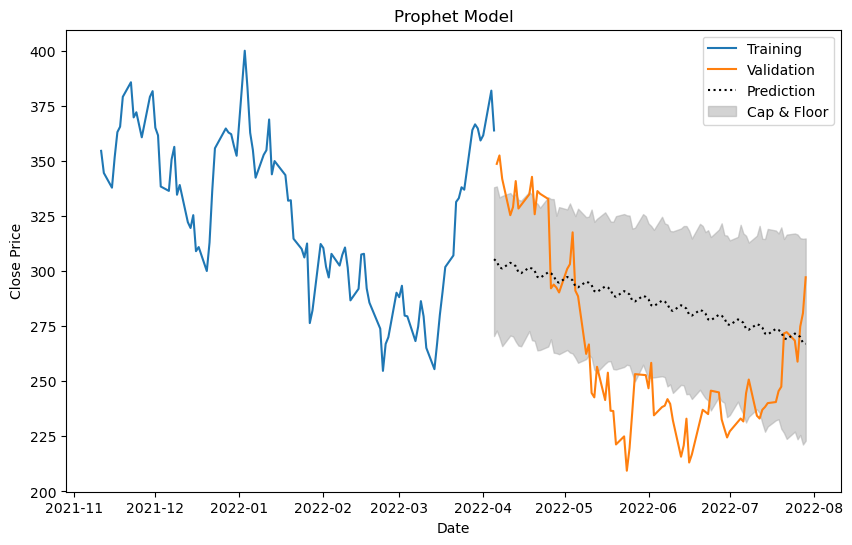

In [41]:
#viz = viz_df.iloc[-400:,:]
fig, ax1 = plt.subplots()
ax1.plot(data_train.iloc[-100:,:].Close)
ax1.plot(data_test.Close)
ax1.plot(predict_df.yhat, color='black', linestyle=':')
ax1.fill_between(predict_df.index, predict_df['yhat_upper'], predict_df['yhat_lower'], alpha=0.5, color='darkgray')
ax1.set_title('Prophet Model')
ax1.set_ylabel('Close Price')
ax1.set_xlabel('Date')
L=ax1.legend(['Training', 'Validation','Prediction', 'Cap & Floor' ]) #get the legend

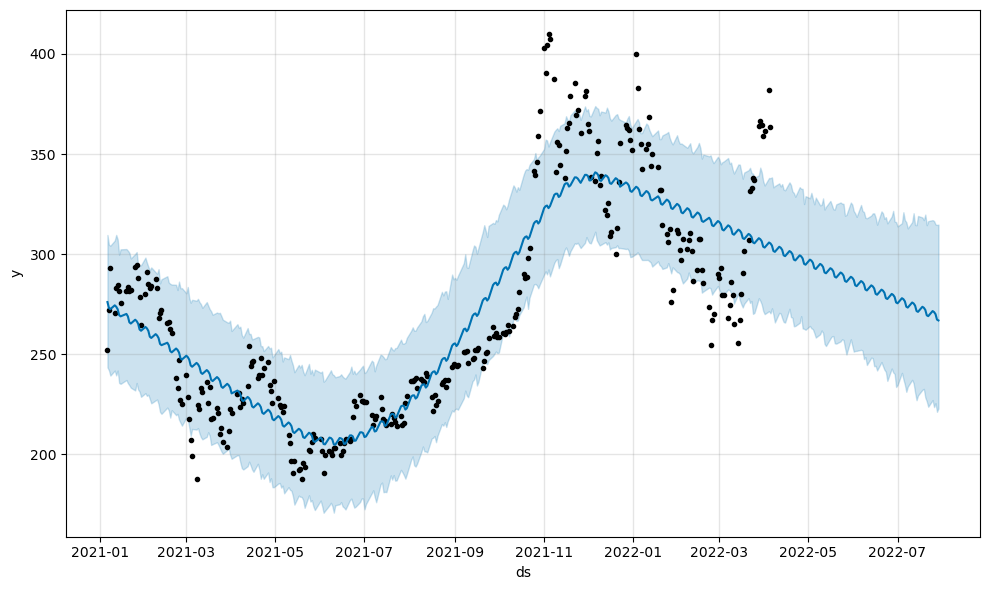

In [42]:
fig1 = model.plot(forecast)

In [43]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import ParameterGrid

df = tsla_data[['first_diff']].reset_index().rename(columns={'Date': 'ds', 'first_diff': 'y'})

# Split the data into training and validation sets
train_size = int(len(df) * 0.8)
train_data, valid_data = df[:train_size], df[train_size:]

# Define hyperparameters grid for tuning
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    # Add more hyperparameters as needed
}

# Perform hyperparameter tuning
best_mae = float('inf')
best_params = None

for params in ParameterGrid(param_grid):
    model = Prophet(**params)
    model.fit(train_data)

    # Make predictions on the validation set
    future = model.make_future_dataframe(periods=len(valid_data))
    forecast = model.predict(future)

    # Calculate MAE
    mae = mean_absolute_error(valid_data['y'], forecast['yhat'][-len(valid_data):])

    # Update best parameters if the current model is better
    if mae < best_mae:
        best_mae = mae
        best_params = params

print("Best Hyperparameters:", best_params)
print("Best MAE:", best_mae)

# Train the final model with the best hyperparameters
final_model = Prophet(**best_params)
final_model.fit(df)


10:49:31 - cmdstanpy - INFO - Chain [1] start processing
10:49:31 - cmdstanpy - INFO - Chain [1] done processing
10:49:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:49:31 - cmdstanpy - INFO - Chain [1] start processing
10:49:31 - cmdstanpy - INFO - Chain [1] done processing
10:49:31 - cmdstanpy - INFO - Chain [1] start processing
10:49:31 - cmdstanpy - INFO - Chain [1] done processing
10:49:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abnormally. Falling back to Newton.
10:49:31 - cmdstanpy - INFO - Chain [1] start processing
10:49:31 - cmdstanpy - INFO - Chain [1] done processing
10:49:31 - cmdstanpy - INFO - Chain [1] start processing
10:49:31 - cmdstanpy - INFO - Chain [1] done processing
10:49:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
Optimization terminated abn

10:49:36 - cmdstanpy - INFO - Chain [1] done processing
10:49:36 - cmdstanpy - INFO - Chain [1] start processing
10:49:36 - cmdstanpy - INFO - Chain [1] done processing
10:49:36 - cmdstanpy - INFO - Chain [1] start processing
10:49:36 - cmdstanpy - INFO - Chain [1] done processing
10:49:36 - cmdstanpy - INFO - Chain [1] start processing
10:49:36 - cmdstanpy - INFO - Chain [1] done processing
10:49:37 - cmdstanpy - INFO - Chain [1] start processing
10:49:37 - cmdstanpy - INFO - Chain [1] done processing
10:49:37 - cmdstanpy - INFO - Chain [1] start processing
10:49:37 - cmdstanpy - INFO - Chain [1] done processing
10:49:37 - cmdstanpy - INFO - Chain [1] start processing
10:49:37 - cmdstanpy - INFO - Chain [1] done processing
10:49:37 - cmdstanpy - INFO - Chain [1] start processing
10:49:37 - cmdstanpy - INFO - Chain [1] done processing
10:49:37 - cmdstanpy - INFO - Chain [1] start processing
10:49:37 - cmdstanpy - INFO - Chain [1] done processing
10:49:37 - cmdstanpy - INFO - Chain [1] 

Best Hyperparameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.01, 'seasonality_prior_scale': 0.01}
Best MAE: 9.10444335930075


In [44]:
final_model = Prophet(changepoint_prior_scale=0.1, holidays_prior_scale=0.01, seasonality_prior_scale=0.01)
final_model.fit(df)


10:49:39 - cmdstanpy - INFO - Chain [1] start processing
10:49:39 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = final_model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed
forecast = final_model.predict(future)


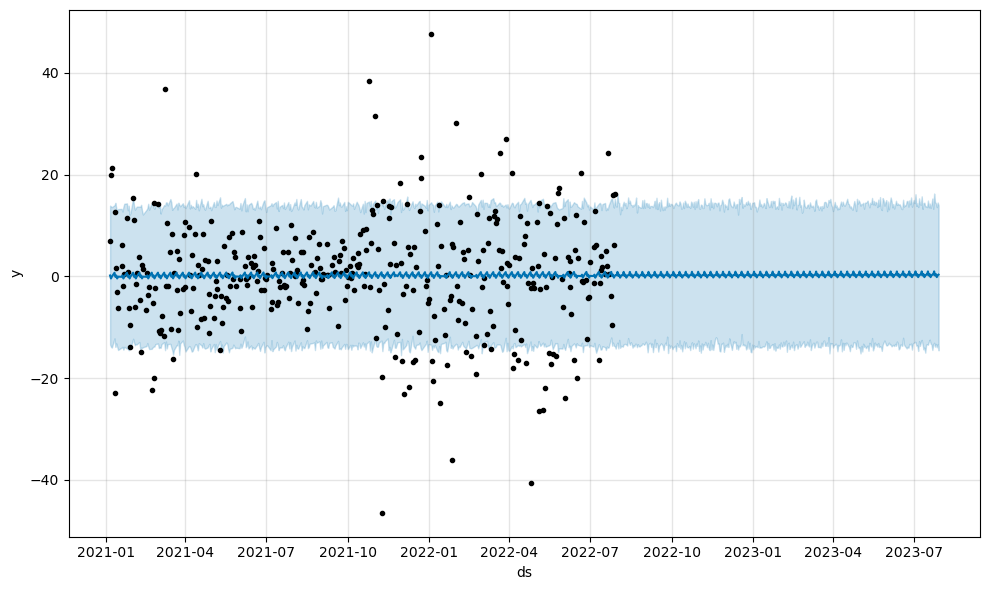

In [46]:
fig = final_model.plot(forecast)


In [47]:
prophet_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
prophet_df

,ds,yhat,yhat_lower,yhat_upper
0,2021-01-06,0.176105,-13.390723,13.908088
1,2021-01-07,-0.417645,-13.844358,13.718821
2,2021-01-08,-0.058136,-14.006058,13.616195
3,2021-01-11,0.720441,-12.188916,13.995308
4,2021-01-12,-0.086931,-13.851881,14.457916
...,...,...,...,...
754,2023-07-25,0.176999,-13.822962,14.631225
755,2023-07-26,0.442169,-13.282051,14.382553
756,2023-07-27,-0.151612,-13.945694,13.618405
757,2023-07-28,0.207866,-13.345414,14.533739


In [48]:
filtered_df = prophet_df[(prophet_df['ds'] >= '2022-09-01') & (prophet_df['ds'] <= '2022-09-14')]

In [49]:
Prophet_future_Predictions = filtered_df['yhat']
Prophet_future_Predictions

427   -0.243337
428    0.116141
429    0.248495
430    0.248774
431    0.894627
432    0.087225
433    0.352395
434   -0.241386
435    0.118093
436    0.250446
437    0.250725
438    0.896579
439    0.089177
440    0.354347
Name: yhat, dtype: float64

In [50]:
j = Prophet_future_Predictions.iloc[0] + last_close_price
Prophet_closing_price = []
for i in Prophet_future_Predictions:
    i = i + j
    j = i
    Prophet_closing_price.append(i)
    print(i)

296.66331960423315
296.77946054464405
297.02795539798433
297.2767291546074
298.17135624909014
298.25858139929005
298.61097656411704
298.3695910186446
298.48768355970566
298.73813001369945
298.9888553709769
299.88543406611274
299.97461081696525
300.3289575824466


### GARCH

In [51]:
!pip install arch

In [52]:
# GARCH(3,3)
from arch import arch_model

model = arch_model(tsla_data['first_diff'], p=1, q=1)

In [53]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1658.3294558901762
Iteration:      2,   Func. Count:     12,   Neg. LLF: 1511.3939760693345
Iteration:      3,   Func. Count:     19,   Neg. LLF: 1478.8979107802359
Iteration:      4,   Func. Count:     25,   Neg. LLF: 1466.1534242729522
Iteration:      5,   Func. Count:     31,   Neg. LLF: 2667688.616276293
Iteration:      6,   Func. Count:     38,   Neg. LLF: 1465.7728304439004
Iteration:      7,   Func. Count:     44,   Neg. LLF: 1465.8652230983432
Iteration:      8,   Func. Count:     50,   Neg. LLF: 1465.7507004193058
Iteration:      9,   Func. Count:     54,   Neg. LLF: 1465.7507004192707
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1465.7507004193058
            Iterations: 9
            Function evaluations: 54
            Gradient evaluations: 9


In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             first_diff   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1465.75
Distribution:                  Normal   AIC:                           2939.50
Method:            Maximum Likelihood   BIC:                           2955.41
                                        No. Observations:                  394
Date:                Sun, May 05 2024   Df Residuals:                      393
Time:                        10:49:43   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2607      0.403      0.647      0.518 [ -0.529,  1.051]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.4077      1.504      0.936      0.349   [ -1.541,  4.356]
alpha[1]       0.0795  3.009e-02      2.642  8.238e-03 [2.053e-02,  0.138]
beta[1]        0.9124  2.883e-02     31.650 7.613e-220   [  0.856,  0.969]
==========================================================================

Covariance estimator: robust
"""

In [55]:
returns = tsla_data['first_diff']

In [56]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    test = returns[-(test_size-i):]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [57]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

In [58]:
import matplotlib.pyplot as plt

# Reset default rc settings
plt.rcdefaults()


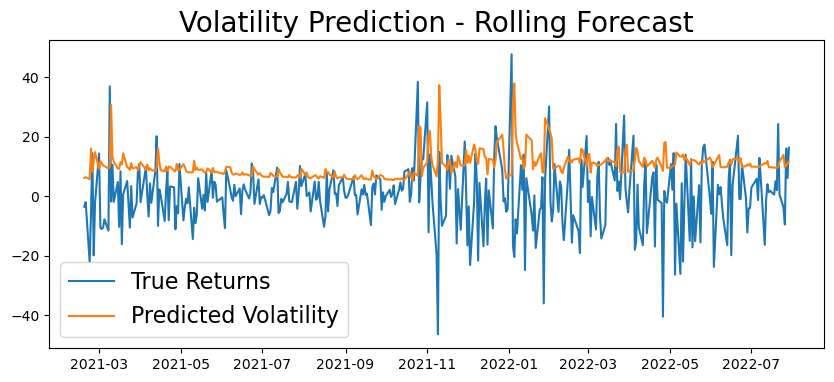

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [60]:
pred = model_fit.forecast(horizon=14)
future_dates = [returns.index[-1] + pd.Timedelta(days=i) for i in range(1,15)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 14 Days')

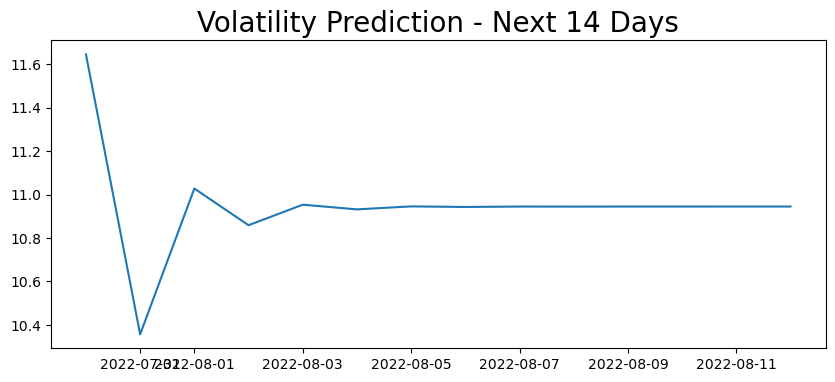

In [61]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 14 Days', fontsize=20)

In [62]:
tsla_data['Close'].iloc[-1]

297.1499938964844

In [63]:
pred

2022-07-30    11.645293
2022-07-31    10.357203
2022-08-01    11.027674
2022-08-02    10.858941
2022-08-03    10.953348
2022-08-04    10.931828
2022-08-05    10.945492
2022-08-06    10.942837
2022-08-07    10.944845
2022-08-08    10.944535
2022-08-09    10.944834
2022-08-10    10.944801
2022-08-11    10.944847
2022-08-12    10.944844
dtype: float64

In [64]:
# Last known closing price
last_close_price = tsla_data['Close'].iloc[-1]

Garch_forecast_close_price = last_close_price + pred

# Print the converted forecasted closing prices
print(Garch_forecast_close_price)

2022-07-30    308.795287
2022-07-31    307.507197
2022-08-01    308.177668
2022-08-02    308.008935
2022-08-03    308.103342
2022-08-04    308.081822
2022-08-05    308.095486
2022-08-06    308.092831
2022-08-07    308.094839
2022-08-08    308.094528
2022-08-09    308.094828
2022-08-10    308.094795
2022-08-11    308.094841
2022-08-12    308.094838
dtype: float64


In [65]:
# Scale the series to a range of 0
scaled_series = (pred - pred.min()) / (pred.max() - pred.min())

# Print the scaled series
print(scaled_series)

2022-07-30    1.000000
2022-07-31    0.000000
2022-08-01    0.520515
2022-08-02    0.389520
2022-08-03    0.462813
2022-08-04    0.446106
2022-08-05    0.456714
2022-08-06    0.454653
2022-08-07    0.456212
2022-08-08    0.455971
2022-08-09    0.456203
2022-08-10    0.456178
2022-08-11    0.456213
2022-08-12    0.456211
dtype: float64


In [66]:
Scaled_garch = last_close_price + scaled_series
Scaled_garch

2022-07-30    298.149994
2022-07-31    297.149994
2022-08-01    297.670509
2022-08-02    297.539514
2022-08-03    297.612807
2022-08-04    297.596100
2022-08-05    297.606708
2022-08-06    297.604647
2022-08-07    297.606205
2022-08-08    297.605965
2022-08-09    297.606197
2022-08-10    297.606172
2022-08-11    297.606207
2022-08-12    297.606205
dtype: float64

In [67]:
# Convert index to datetime
Scaled_garch.index = pd.to_datetime(Scaled_garch.index)

# Filter the Series for dates between '2022-08-01' and '2022-08-12'
Scaled_filtered_series = Scaled_garch.loc['2022-08-02':'2022-08-12']

# Create a date range from '2022-08-01' to '2022-08-14'
date_range = pd.date_range(start='2022-08-02', end='2022-08-15')

# Find remaining dates not present in the filtered series
remaining_dates = date_range.difference(Scaled_filtered_series.index)

# Fill missing values using forward fill and sort the index
Scaled_filtered_series = Scaled_filtered_series.reindex(date_range).fillna(method='ffill')

# Sort the series by index
Scaled_filtered_series.sort_index(inplace=True)

# Print the filtered Series
print(Scaled_filtered_series)


2022-08-02    297.539514
2022-08-03    297.612807
2022-08-04    297.596100
2022-08-05    297.606708
2022-08-06    297.604647
2022-08-07    297.606205
2022-08-08    297.605965
2022-08-09    297.606197
2022-08-10    297.606172
2022-08-11    297.606207
2022-08-12    297.606205
2022-08-13    297.606205
2022-08-14    297.606205
2022-08-15    297.606205
Freq: D, dtype: float64


In [68]:
# Convert index to datetime
pred.index = pd.to_datetime(pred.index)

# Filter the Series for dates between '2022-08-01' and '2022-08-12'
pred_filtered_series = Scaled_garch.loc['2022-08-01':'2022-08-12']

# Create a date range from '2022-08-01' to '2022-08-14'
date_range = pd.date_range(start='2022-08-01', end='2022-08-14')

# Find remaining dates not present in the filtered series
remaining_dates = date_range.difference(pred_filtered_series.index)

# Fill missing values using forward fill and sort the index
pred_filtered_series = pred_filtered_series.reindex(date_range).fillna(method='ffill')

# Sort the series by index
pred_filtered_series.sort_index(inplace=True)

# Print the filtered Series
print(pred_filtered_series)


2022-08-01    297.670509
2022-08-02    297.539514
2022-08-03    297.612807
2022-08-04    297.596100
2022-08-05    297.606708
2022-08-06    297.604647
2022-08-07    297.606205
2022-08-08    297.605965
2022-08-09    297.606197
2022-08-10    297.606172
2022-08-11    297.606207
2022-08-12    297.606205
2022-08-13    297.606205
2022-08-14    297.606205
Freq: D, dtype: float64


In [69]:
j = scaled_series.iloc[0] + last_close_price
Garch_forecast = []
for i in scaled_series:
    i = i + j
    j = i
    Garch_forecast.append(i)
    print(i)

299.1499938964844
299.1499938964844
299.67050926635784
300.06002958328736
300.52284265646693
300.96894850624824
301.4256626167564
301.88031540064685
302.3365269582806
302.79249759126225
303.24870069057175
303.7048783264792
304.1610911946838
304.61730194343374


### Combined models

In [70]:
tsla_data

,Close,first_diff,Returns
Date,,,
2021-01-06,251.993332,6.956665,0.028390
2021-01-07,272.013336,20.020004,0.079447
2021-01-08,293.339996,21.326660,0.078403
2021-01-11,270.396667,-22.943329,-0.078214
2021-01-12,283.146667,12.750000,0.047153
...,...,...,...
2022-07-25,268.433319,-3.810028,-0.013995
2022-07-26,258.859985,-9.573334,-0.035664
2022-07-27,274.820007,15.960022,0.061655


In [71]:
# Create a DataFrame with 'ds' and 'y' columns
Comb_df = pd.DataFrame({
    'ds': tsla_data.reset_index()['Date'],
    'y': tsla_data.reset_index()['Returns']
})

# Print the DataFrame
Comb_df

,ds,y
0,2021-01-06,0.028390
1,2021-01-07,0.079447
2,2021-01-08,0.078403
3,2021-01-11,-0.078214
4,2021-01-12,0.047153
...,...,...
389,2022-07-25,-0.013995
390,2022-07-26,-0.035664
391,2022-07-27,0.061655
392,2022-07-28,0.022124


In [72]:
import pandas as pd
from prophet import Prophet
from arch import arch_model
import matplotlib.pyplot as plt

# Sample data preparation
# Assume 'df' is your DataFrame with columns 'ds' for dates and 'y' for stock prices
# df = pd.read_csv('path_to_your_data.csv')

# Using Prophet to predict trends
prophet_model = Prophet(daily_seasonality=False, yearly_seasonality=False)
prophet_model.fit(Comb_df)
future = prophet_model.make_future_dataframe(periods=30)  # forecast 30 days into the future
forecast = prophet_model.predict(future)

# Calculate residuals
df['yhat'] = forecast['yhat'][:len(df)]
df['residuals'] = df['y'] - df['yhat']

# Modeling residuals with GARCH
garch_model = arch_model(df['residuals'], vol='Garch', p=7, q=7)
res = garch_model.fit(update_freq=5)

print(res.summary())


10:49:46 - cmdstanpy - INFO - Chain [1] start processing
10:49:46 - cmdstanpy - INFO - Chain [1] done processing


Iteration:      5,   Func. Count:     90,   Neg. LLF: 1556.9716746063505
Iteration:     10,   Func. Count:    181,   Neg. LLF: 1463.5029588008995
Iteration:     15,   Func. Count:    271,   Neg. LLF: 1454.685455389067
Iteration:     20,   Func. Count:    356,   Neg. LLF: 1454.6232988891666
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1454.6232929982878
            Iterations: 22
            Function evaluations: 389
            Gradient evaluations: 22
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1454.62
Distribution:                  Normal   AIC:                           2941.25
Method:            Maximum Likelihood   BIC:                           3004.87
                        

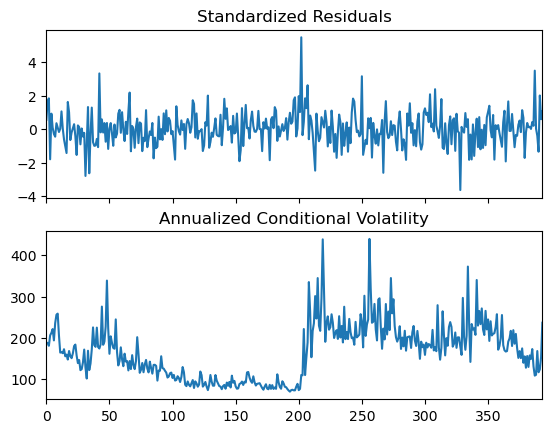

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              residuals   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1454.62
Distribution:                  Normal   AIC:                           2941.25
Method:            Maximum Likelihood   BIC:                           3004.87
                                        No. Observations:                  394
Date:                Sun, May 05 2024   Df Residuals:                      393
Time:                        10:49:46   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2431      1.546      0.157      0.875 [ -2.787,  3.27

In [73]:
# Plot the conditional volatility
fig = res.plot(annualize='D')
plt.show()

# Output the summary of the model
print(res.summary())

In [74]:
comb_pred = res.forecast(horizon=14)
future_dates = [returns.index[-1] + pd.Timedelta(days=i) for i in range(1,15)]
comb_pred = pd.Series(np.sqrt(comb_pred.variance.values[-1,:]), index=future_dates)

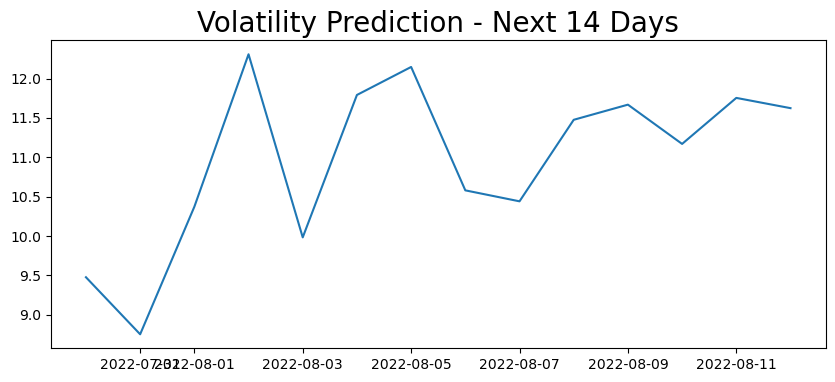

In [75]:
plt.figure(figsize=(10,4))
plt.plot(comb_pred)
plt.title('Volatility Prediction - Next 14 Days', fontsize=20)
plt.show()

In [76]:
filtered_df = forecast[(forecast['ds'] >= '2022-08-01') & (forecast['ds'] <= '2022-08-14')]
future_Predictions = filtered_df['trend']
future_Predictions

396    0.007042
397    0.007045
398    0.007048
399    0.007051
400    0.007054
401    0.007057
402    0.007061
403    0.007064
404    0.007067
405    0.007070
406    0.007073
407    0.007076
408    0.007079
409    0.007082
Name: trend, dtype: float64

In [77]:
# Last known closing price
last_close_price = tsla_data['Close'].iloc[-1]

#forecast_close_price = last_close_price + future_Predictions
forecast_close_price = last_close_price * (1 + future_Predictions)


# Print the converted forecasted closing prices
print(forecast_close_price)


396    299.242531
397    299.243450
398    299.244369
399    299.245289
400    299.246208
401    299.247128
402    299.248047
403    299.248966
404    299.249886
405    299.250805
406    299.251724
407    299.252644
408    299.253563
409    299.254483
Name: trend, dtype: float64


## Model Evaluation

In [78]:
import datetime
import yfinance as yf

stock = 'TSLA'
start = datetime.datetime(2022, 7, 31)
end = start + datetime.timedelta(days=14)
tsla_data_test = yf.download(stock, start=start, end=end, interval='1d')['Close']


[*********************100%%**********************]  1 of 1 completed


In [79]:
tsla_data_test

Date
2022-08-01    297.276672
2022-08-02    300.586670
2022-08-03    307.396667
2022-08-04    308.633331
2022-08-05    288.170013
2022-08-08    290.423340
2022-08-09    283.333344
2022-08-10    294.356659
2022-08-11    286.630005
2022-08-12    300.029999
Name: Close, dtype: float64

In [80]:
date_range = pd.date_range(start=tsla_data_test.index[0], end=start + datetime.timedelta(days=14))
remaining_dates = date_range.difference(tsla_data_test.index)
for i in remaining_dates:
    tsla_data_test.loc[i] = np.nan
tsla_data_test.sort_index(inplace = True)
tsla_data_test = tsla_data_test.fillna(method='ffill')
tsla_data_test

Date
2022-08-01    297.276672
2022-08-02    300.586670
2022-08-03    307.396667
2022-08-04    308.633331
2022-08-05    288.170013
2022-08-06    288.170013
2022-08-07    288.170013
2022-08-08    290.423340
2022-08-09    283.333344
2022-08-10    294.356659
2022-08-11    286.630005
2022-08-12    300.029999
2022-08-13    300.029999
2022-08-14    300.029999
Name: Close, dtype: float64

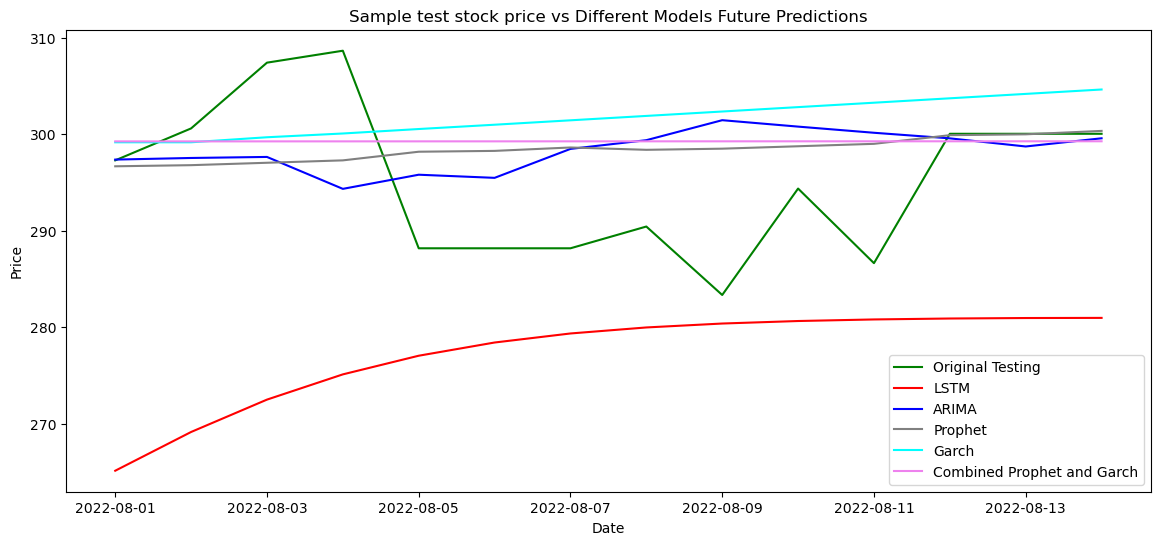

In [81]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,6)

# Plotting tsla_data_test in green
plt.plot(tsla_data_test.index, tsla_data_test, color='green', label='Original Testing')

# Plotting lstm_future_predictions_list in red
plt.plot(tsla_data_test.index, lstm_future_predictions_list, color='red', label='LSTM')

# Plotting ARIMA_future_predictions_list in blue
plt.plot(tsla_data_test.index, ARIMA_forecast_close_price, color='blue', label='ARIMA')

# Plotting prophet_future_predictions_list in cyan
plt.plot(tsla_data_test.index, Prophet_closing_price, color='grey', label='Prophet')

# Plotting GARCH_future_predictions_list in orange
plt.plot(tsla_data_test.index, Garch_forecast, color='cyan', label='Garch')


# Plotting Prophet and Garch_future_predictions_list in orange
plt.plot(tsla_data_test.index, forecast_close_price, color='violet', label='Combined Prophet and Garch')


# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Sample test stock price vs Different Models Future Predictions')
plt.legend()

# Display the plot
plt.show()

### DART (Performing ARIMA and Prophet)

In [82]:
pip install darts

Note: you may need to restart the kernel to use updated packages.


/Users/pulicharishma/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


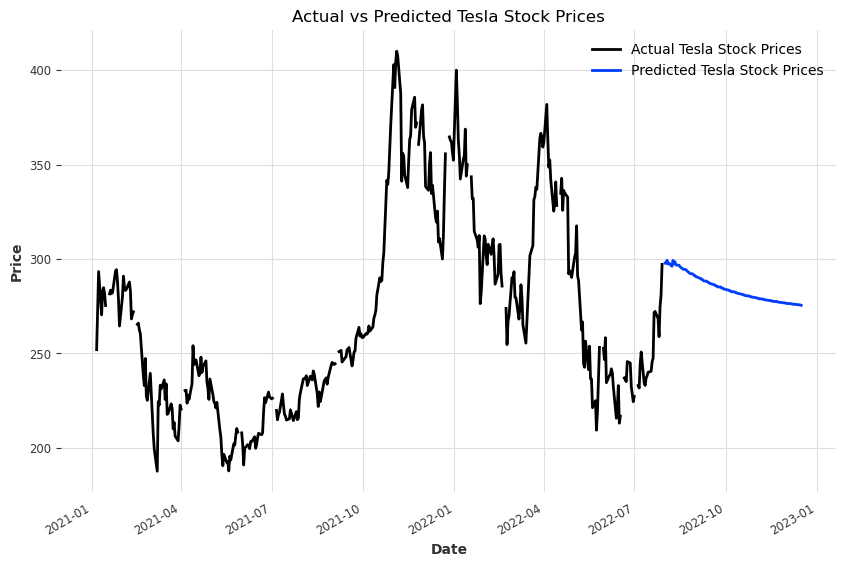

In [83]:
import yfinance as yf
from darts import TimeSeries
from darts.models import ARIMA
from darts.utils.timeseries_generation import datetime_attribute_timeseries
import matplotlib.pyplot as plt

# Create a TimeSeries object from the 'Close' prices, explicitly setting the frequency to 'B' (business day)
ts = TimeSeries.from_series(tsla_data['Close'], freq='B')

# Define ARIMA parameters and train the model
model = ARIMA(p=12, d=1, q=2)
model.fit(ts)

# Make predictions for the next 100 time steps
pred = model.predict(100)

# Plot actual Tesla stock prices and predicted values
plt.figure(figsize=(10, 6))
ts.plot(label='Actual Tesla Stock Prices')
pred.plot(label='Predicted Tesla Stock Prices', lw=2)
plt.title('Actual vs Predicted Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


10:49:53 - cmdstanpy - INFO - Chain [1] start processing
10:49:53 - cmdstanpy - INFO - Chain [1] done processing


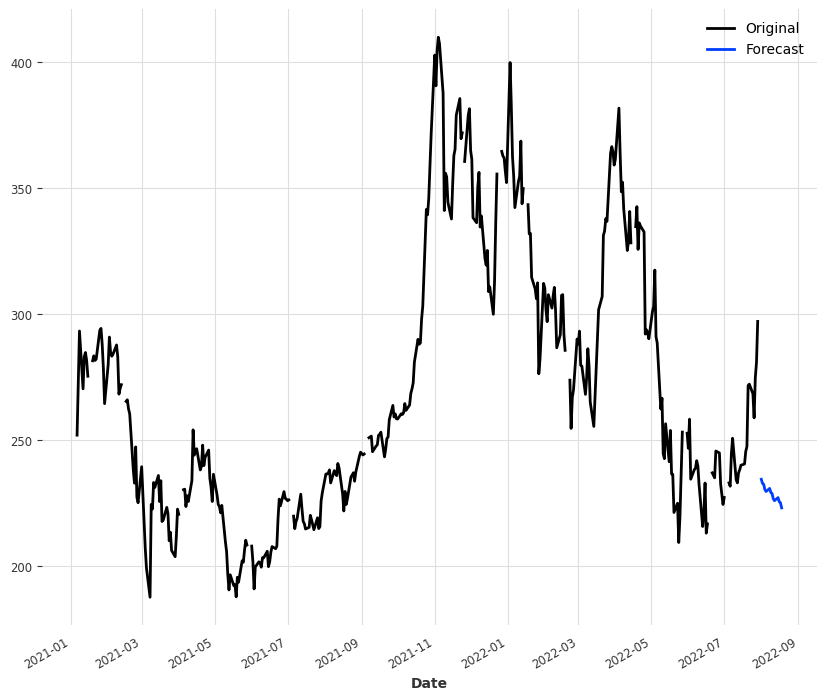

In [84]:
from darts.models.forecasting.prophet_model import Prophet
from darts import TimeSeries
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))

# Assuming tsla_data contains the closing prices of TSLA stock
df = tsla_data.reset_index()
series = TimeSeries.from_dataframe(df, time_col='Date', value_cols=['Close'], fill_missing_dates=True, freq = 'B')

# Create a Prophet model
prophet_model = Prophet()

# Fit the model to your time series data
prophet_model.fit(series)

# Make forecasts with the fitted model
forecast = prophet_model.predict(n=14)  # Forecast for 14 future time steps

# Plot the original time series and the forecasted values
series.plot(label='Original')
forecast.plot(label='Forecast')
plt.legend()
plt.show()

# Calculate metrics
actual_values = series[-14:]


10:49:54 - cmdstanpy - INFO - Chain [1] start processing
10:49:54 - cmdstanpy - INFO - Chain [1] done processing


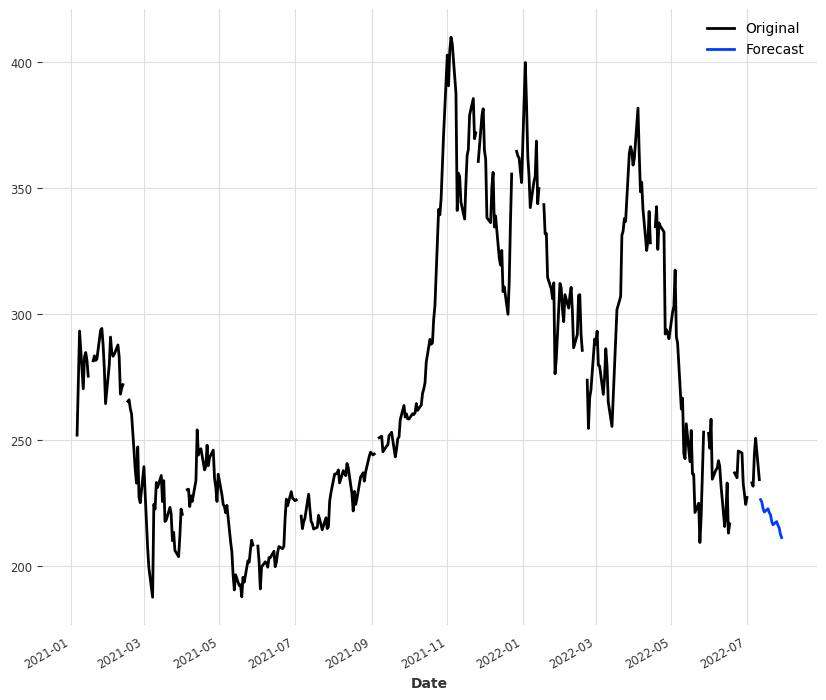

In [85]:
import matplotlib.pyplot as plt3
plt3.figure(figsize=(10,8))
# Define the number of rows for the test set
test_size = 14

# Split the data into train and test sets
train_data = tsla_data[:-test_size].reset_index()
test_data = tsla_data[-test_size:].reset_index()

series = TimeSeries.from_dataframe(train_data, time_col='Date', value_cols=['Close'], fill_missing_dates=True, freq = 'B')
test_series = TimeSeries.from_dataframe(test_data, time_col='Date', value_cols=['Close'], fill_missing_dates=True, freq = 'B')

# Create a Prophet model
prophet_model = Prophet(changepoint_prior_scale=0.1, holidays_prior_scale=0.01, seasonality_prior_scale=1.0)

# Fit the model to your time series data
prophet_model.fit(series)

# Make forecasts with the fitted model
forecast = prophet_model.predict(n=14)  # Forecast for 14 future time steps

# Plot the original time series and the forecasted values
series.plot(label='Original')
forecast.plot(label='Forecast')
plt3.legend()
plt3.show()

# Calculate metrics
actual_values = test_series[-14:]

# Train the model using the training set
# Here you would train your model using train_data

# Forecast the next 14 days
# Here you would use your trained model to forecast the next 14 days

# Test the model with the testing set
# Here you would compare your forecasted values with the actual values in test_data


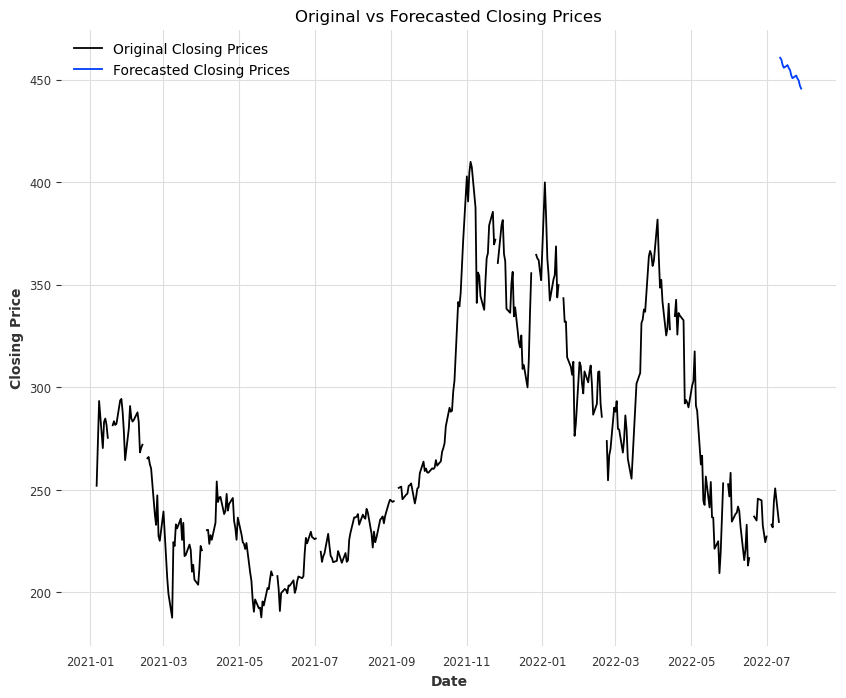

In [86]:
# Convert forecasted first differences back to closing prices
forecasted_diff = forecast.values()
last_close = series.last_value()  # Last observed closing price
forecasted_close = [last_close + diff for diff in forecasted_diff]

# Plot the original closing prices and the forecasted closing prices
plt.figure(figsize=(10, 8))
plt.plot(series.time_index, series.values(), label='Original Closing Prices')
plt.plot(forecast.time_index, forecasted_close, label='Forecasted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Original vs Forecasted Closing Prices')
plt.legend()
plt.grid(True)
plt.show()


In [87]:
test_series

<TimeSeries (DataArray) (Date: 14, component: 1, sample: 1)>
array([[[233.07000732]],

       [[237.03999329]],

       [[238.31333923]],

       [[240.06666565]],

       [[240.54666138]],

       [[245.52999878]],

       [[247.5       ]],

       [[271.70666504]],

       [[272.24334717]],

       [[268.43331909]],

       [[258.85998535]],

       [[274.82000732]],

       [[280.8999939 ]],

       [[297.1499939 ]]])
Coordinates:
  * Date       (Date) datetime64[ns] 2022-07-12 2022-07-13 ... 2022-07-29
  * component  (component) object 'Close'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None